In [1]:
import os

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_ptx_ar_inference import ARGUS_ptx_ar_inference
from ARGUS_ptx_roi_inference import ARGUS_ptx_roi_inference

In [2]:
ptx_ar = ARGUS_ptx_ar_inference(config_file_name="../ARGUS/ARGUS_ptx_ar.cfg", network_name="final", device_num=0)
ptx_roi = ARGUS_ptx_roi_inference(config_file_name="../ARGUS/ARGUS_ptx_roi.cfg", network_name="final", device_num=0)

In [3]:
ptx_ar_best_models = [8, 3, 6]
ptx_roi_best_models = [4, 3, 1]

for r in range(ptx_ar.num_models):
    model_name = os.path.join("Results_Best", "ptx_vfold_run"+str(r), "best_model_"+str(ptx_ar_best_models[r])+".pth")
    ptx_ar.load_model(r, model_name)

for r in range(ptx_roi.num_models):
    model_name = os.path.join("Results_Best", "ptx_roi_run"+str(r), "best_model_"+str(ptx_roi_best_models[r])+".pth")
    ptx_roi.load_model(r, model_name)

In [12]:
#vid = ARGUS_load_video("Data_PTX/original/BAMC-PTXNoSliding/025ns_Image_262499828648_clean.mp4")
vid = ARGUS_load_video("Data_PTX/original/BAMC-PTXSliding/004s_image_73815992352100_clean.mp4")

In [13]:
print(vid.shape)

(61, 1080, 1920)


In [14]:
ptx_ar.preprocess(vid)

(12, 320, 320)
12


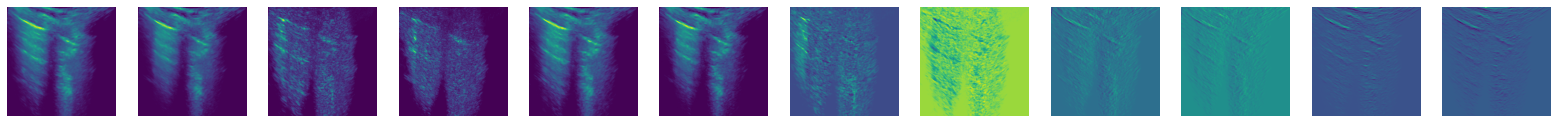

In [15]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

arr = ptx_ar.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure(figsize=[30, 30])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(arr[c, :, :],270))
plt.show()

In [16]:
labels = ptx_ar.inference()

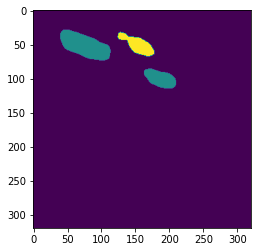

In [17]:
plt.imshow(rotate(labels,270))

In [18]:
ptx_roi.generate_roi(ptx_ar.input_image, ptx_ar.input_array, ptx_ar.label_array)

In [19]:
ptx_roi.inference()

(0, array([1., 0.]))